<div>
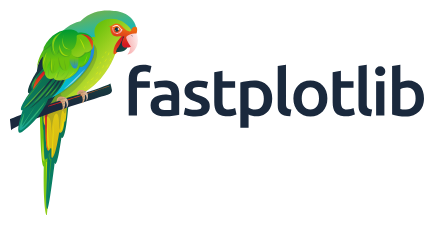
</div>

# Introduction to `fastplotlib`

## `fastplotlib` API

### 1. Graphics - objects that are drawn
- `Image`, `Line`, `Scatter`
- Collections - `LineCollection`, `LineStack` (ex: neural timeseries data)

    #### a) Graphic Properties
  - Common: `Name`, `Offset`, `Rotation`, `Visible`, `Deleted`
  - Graphic Specific: `ImageVmin`, `ImageVmax`, `VertexColors`, etc.

  #### b) Selectors
  - `LinearSelector` - horizontal or vertical line slider
  - `LinearRegionSelector` - horizontal or vertical resizable region selection

### 2. Layouts
- `Figure` - a single plot or a grid of subplots

### 3. Widgets - high level widgets to make repetitive UIs easier
- `ImageWidget`- widget for `ImageGraphic` data with dims: `xy`, `txy`, `tzxy`
- Sliders, support window functions, etc.

This notebook will go through some basic components of the `fastplotlib` API including how to instantiate a plot, add graphics to a plot, and subsequently interact with the plot. 

**The example images are from `imageio` so you will need to install it for this example notebook. But `imageio` is not required to use fasptlotlib**

In [1]:
!pip install imageio

In [2]:
import imageio.v3 as iio

By default, `fastplotlib` will enumerate the available devices and highlight which device has been selected by default when importing the module.

In [3]:
import fastplotlib as fpl
import numpy as np
from itertools import product

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01,\x00\x00\x007\x08\x06\x00\x00\x00\xb6\x1bw\x99\x…

MESA-INTEL: warning: cannot initialize blitter engine
Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.
Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.
Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.
Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.
Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.


Available devices:
🯄 (default) | Intel(R) Arc(tm) Graphics (MTL) | IntegratedGPU | Vulkan | Mesa 24.0.8-1
❗ | llvmpipe (LLVM 17.0.6, 256 bits) | CPU | Vulkan | Mesa 24.0.8-1 (LLVM 17.0.6)
❗ | Mesa Intel(R) Arc(tm) Graphics (MTL) | IntegratedGPU | OpenGL | 


## Simple image

In [4]:
# create a `Figure` instance
# by default the figure will have 1 subplot
fig = fpl.Figure(size=(600, 500))

# get a grayscale image
data = iio.imread("imageio:camera.png")

# plot the image data
image_graphic = fig[0, 0].add_image(data=data, name="sample-image")

# show the plot
fig.show(sidecar=True)

RFBOutputContext()

Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.


JupyterOutputContext(children=(JupyterWgpuCanvas(css_height='500px', css_width='600px'), IpywidgetToolBar(children=(Button(icon='expand-arrows-alt', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='auto-scale scene'), Button(icon='align-center', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='auto-center scene'), ToggleButton(value=True, icon='hand-pointer', layout=Layout(width='auto'), tooltip='panzoom controller'), ToggleButton(value=True, description='1:1', layout=Layout(width='auto'), style=ToggleButtonStyle(font_weight='bold'), tooltip='maintain aspect'), Button(icon='arrow-down', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='y-axis direction'), Button(icon='draw-polygon', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='add PolygonSelector'), ToggleButton(value=False, icon='video', layout=Layout(width='auto'), tooltip='record'), Dropdown(description='Subplots:', layout=Layout(width='200px'), options=('(0, 0)',), value='(0, 0)')))))

**Use the handle on the bottom right corner of the canvas to resize it. You can also pan and zoom using your mouse!**

Changing graphic **properties**

In [5]:
image_graphic.cmap = "viridis"

### Slicing data

**Most properties, such as data, support slicing!**

Our image data is of shape [n_rows, n_columns]

In [6]:
image_graphic.data.value.shape

(512, 512)

In [7]:
image_graphic.data[::15, :] = 1
image_graphic.data[:, ::15] = 1

**Fancy indexing**

In [8]:
image_graphic.data[data > 175] = 255

**Adjust vmin vmax**

In [9]:
image_graphic.vmin = 50
image_graphic.vmax = 150

In [10]:
image_graphic.reset_vmin_vmax()

### Change graphic properties 

Now that we have a better idea of how graphic properties can be dynamically changed, let's practice :D

**Question:** Can you change the data of the image to be random data of the same shape? Hint: Use `np.random.rand()` to create the new data.

In [14]:
# create new random data the same shape as the original image
### insert code

# update the data 
### insert code

**Question:** Can you change the colormap of the image? See [here](https://matplotlib.org/stable/gallery/color/colormap_reference.html) for a list of colormaps.

In [15]:
### insert code here

In [16]:
# close the plot
fig.close()

### Image updates

This examples show how you can define animation functions that run on every render cycle.

In [17]:
# create another `Figure` instance
fig_v = fpl.Figure(size=(600, 500))

fig.canvas.max_buffered_frames = 1

# make some random data again
data = np.random.rand(512, 512)

# plot the data
fig_v[0,0].add_image(data=data, name="random-image")

# a function to update the image_graphic
# a plot will pass its plot instance to the animation function as an argument

def update_data(plot_instance):
    new_data = np.random.rand(512, 512)
    plot_instance[0,0]["random-image"].data = new_data

#add this as an animation function
fig_v.add_animations(update_data)

fig_v.show(sidecar=True)

RFBOutputContext()

JupyterOutputContext(children=(JupyterWgpuCanvas(css_height='500px', css_width='600px'), IpywidgetToolBar(children=(Button(icon='expand-arrows-alt', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='auto-scale scene'), Button(icon='align-center', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='auto-center scene'), ToggleButton(value=True, icon='hand-pointer', layout=Layout(width='auto'), tooltip='panzoom controller'), ToggleButton(value=True, description='1:1', layout=Layout(width='auto'), style=ToggleButtonStyle(font_weight='bold'), tooltip='maintain aspect'), Button(icon='arrow-down', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='y-axis direction'), Button(icon='draw-polygon', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='add PolygonSelector'), ToggleButton(value=False, icon='video', layout=Layout(width='auto'), tooltip='record'), Dropdown(description='Subplots:', layout=Layout(width='200px'), options=('(0, 0)',), value='(0, 0)')))))

In [18]:
fig_v.close()

### Image Practice 

**Question:** Can you do the following:

- create a new plot called `practice_fig`

- add an `ImageGraphic` with the following characteristics to the figure:

  - random data in the shape (512, 512)
  - colormap "viridis"
  - name "random-image"

- set the top-left and bottom-right quadrants of the data to 1 using slicing :D

- add an animation function that updates the top-right and bottom-left quadrants with new random data

In [23]:
# create a new fig
### insert code here

# create random data in the shape (512, 512)
### insert code here

# add image to plot
### insert code here

# set the top-left and bottom-right quadrants of the data to 1
### insert code here

### insert code here

# show the plot
### insert code here


In [24]:
# define an animation function to update the top-right and bottom-left quadrants with new random data
### insert code here

# add the animation function to the figure
### insert code here

In [25]:
# close the plot
### insert code here


## 2D line plots

This example plots a sine wave, cosine wave, and ricker wavelet and demonstrates how **Graphic Features** can be modified by slicing!

### First generate some data.

In [26]:
# linspace, create 100 evenly spaced x values from -10 to 10
xs = np.linspace(-10, 10, 100)
# sine wave
ys = np.sin(xs)
sine = np.column_stack([xs, ys])

# cosine wave
ys = np.cos(xs) + 5
cosine = np.column_stack([xs, ys])

# sinc function
a = 0.5
ys = np.sinc(xs) * 3 + 8
sinc = np.column_stack([xs, ys])

### We will plot all of it on the same plot. Each line plot will be an individual `Graphic`, you can have any combination of graphics on a plot.

In [27]:
# Create a figure
fig_lines = fpl.Figure()

# we will add all the lines to the same subplot
subplot = fig_lines[0, 0]

# plot sine wave, use a single color
sine_graphic = subplot.add_line(data=sine, thickness=5, colors="magenta")

# you can also use colormaps for lines!
cosine_graphic = subplot.add_line(data=cosine, thickness=12, cmap="autumn")

# or a list of colors for each datapoint
colors = ["r"] * 25 + ["purple"] * 25 + ["y"] * 25 + ["b"] * 25
sinc_graphic = subplot.add_line(data=sinc, thickness=5, colors = colors)

# show the plot
fig_lines.show(sidecar=True, sidecar_kwargs={"title": "lines"})

RFBOutputContext()

/home/caitlin/repos/fastplotlib/fastplotlib/graphics/_features/_base.py:37: UserWarning: converting float64 array to float32
  warn(f"converting {array.dtype} array to float32")


JupyterOutputContext(children=(JupyterWgpuCanvas(), IpywidgetToolBar(children=(Button(icon='expand-arrows-alt', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='auto-scale scene'), Button(icon='align-center', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='auto-center scene'), ToggleButton(value=True, icon='hand-pointer', layout=Layout(width='auto'), tooltip='panzoom controller'), ToggleButton(value=True, description='1:1', layout=Layout(width='auto'), style=ToggleButtonStyle(font_weight='bold'), tooltip='maintain aspect'), Button(icon='arrow-up', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='y-axis direction'), Button(icon='draw-polygon', layout=Layout(width='auto'), style=ButtonStyle(), tooltip='add PolygonSelector'), ToggleButton(value=False, icon='video', layout=Layout(width='auto'), tooltip='record'), Dropdown(description='Subplots:', layout=Layout(width='200px'), options=('(0, 0)',), value='(0, 0)')))))

### Graphic properties support slicing! :D

In [28]:
# indexing of colors
cosine_graphic.colors[:15] = "magenta"
cosine_graphic.colors[90:] = "red"
cosine_graphic.colors[60] = "w"

In [31]:
# indexing to assign colormaps to entire lines or segments
sinc_graphic.cmap[10:50] = "gray"
sine_graphic.cmap = "seismic"

In [32]:
# more complex indexing, set the blue value directly from an array
cosine_graphic.colors[65:90, 0] = np.linspace(0, 1, 90-65)

In [33]:
# slicing data
bool_key = [True, True, True, False, False] * 20
sinc_graphic.data[bool_key, 1] = 7  # y vals to 1

### 2D Lines Practice 

**Question:** Can you change the colormap of the sine_graphic to "hsv"?

In [ ]:
### insert code here

**Question:** Can you change the color of first 50 data points of the sinc_graphic to green?

In [ ]:
### insert code here

**Question:** Can you to change the last 50 data points of the cosine_graphic to equal the last 50 points of the sine_graphic?

In [ ]:
### insert code here

#### Capture changes to graphic properties as events

**Two ways to add events in `fastplotlib`**

1) Using `graphic.add_event_handler(callback_func, "property")`


2) Using a decorator:
```
@graphic.add_event_handler("property")
def callback_func(ev):
    pass
```


#### Examples:

In [34]:
# will print event data when the color of the cosine graphic changes
@cosine_graphic.add_event_handler("colors")
def callback_func(ev):
    print(ev.info)

In [35]:
# when the cosine graphic colors change, will also update the sine_graphic colors
def change_colors(ev):
   sine_graphic.colors[ev.info["key"]] = "w"

cosine_graphic.add_event_handler(change_colors, "colors")

<function __main__.change_colors(ev)>

In [36]:
cosine_graphic.colors[:10] = "g"

{'key': slice(None, 10, None), 'value': array([[0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.],
       [0., 1., 0., 1.]], dtype=float32), 'user_value': 'g'}


In [37]:
fig_lines.close()

## More Events :D

In [38]:
# generate some circles
def make_circle(center, radius: float, n_points: int = 75) -> np.ndarray:
    theta = np.linspace(0, 2 * np.pi, n_points)
    xs = radius * np.sin(theta)
    ys = radius * np.cos(theta)

    return np.column_stack([xs, ys]) + center


spatial_dims = (50, 50)

# this makes 16 circles, so we can create 16 cmap values, so it will use these values to set the
# color of the line based by using the cmap as a LUT with the corresponding cmap_value
circles = list()
for center in product(range(0, spatial_dims[0], 15), range(0, spatial_dims[1], 15)):
    circles.append(make_circle(center, 5, n_points=75))

# things like class labels, cluster labels, etc.
cmap_transform = [
    0, 1, 1, 2,
    7, 0, 1, 1,
    2, 2, 8, 3,
    1, 9, 1, 5
]

In [39]:
fig = fpl.Figure()

circles_graphic = fig[0,0].add_line_collection(data=circles, cmap="tab10", cmap_transform=cmap_transform, thickness=10)

RFBOutputContext()

In [40]:
fig.show()

JupyterOutputContext(children=(JupyterWgpuCanvas(), IpywidgetToolBar(children=(Button(icon='expand-arrows-alt'…

In [41]:
# get graphic that is clicked and change the color
def click_event(ev):
    ev.graphic.colors = "w"

In [42]:
# for each circle in the collection, add click event handler
circles_graphic.add_event_handler(click_event, "click")

### Events Practice

**Question:** Can you add another event handler (using either method) to the circles_graphic that will change the colormap of first 50 points in the circle when the colors of one of the circles changes?


In [ ]:
### insert code here

In [43]:
# close the plot
fig.close()

## Selectors

#### Let's look at a `LinearSelector`

In [44]:
fig = fpl.Figure()

# same sine data from before
sine_graphic = fig[0, 0].add_line(data=sine, colors="w")

# add a linear selector the sine wave
selector = sine_graphic.add_linear_selector()

# fastplotlib LinearSelector can make an ipywidget slider and return it :D 
ipywidget_slider = selector.make_ipywidget_slider()
ipywidget_slider.description = "slider"


fig[0, 0].auto_scale()
fig.show(add_widgets=[ipywidget_slider], maintain_aspect=False)

RFBOutputContext()

JupyterOutputContext(children=(JupyterWgpuCanvas(), IpywidgetToolBar(children=(Button(icon='expand-arrows-alt'…

In [45]:
# change the color of the sine wave based on the location of the linear selector
@selector.add_event_handler("selection")
def set_color_at_index(ev):
    # get the selected index
    ix = ev.get_selected_index()
    # get the sine graphic
    g = ev.graphic.parent
    # change the color of the sine graphic at the index of the selector
    g.colors[ix] = "green"

In [46]:
fig.close()

#### Now let's look at a `LinearRegionSelector`

In [47]:
fig = fpl.Figure((2, 1))

# data to plot
xs = np.linspace(0, 10* np.pi, 1_000)
sine = np.sin(xs)
sine += 100

# make sine along x axis
sine_graphic_x = fig[0, 0].add_line(np.column_stack([xs, sine]), offset=(10, 0, 0))

# add a linear region selector
ls_x = sine_graphic_x.add_linear_region_selector()  # default axis is "x"

# get the initial selected date of the linear region selector
zoomed_init = ls_x.get_selected_data()

# make a line graphic for displaying zoomed data
zoomed_x = fig[1, 0].add_line(zoomed_init)

@ls_x.add_event_handler("selection")
def set_zoom_x(ev):
    """sets zoomed x selector data"""
    # get the selected data
    selected_data = ev.get_selected_data()

    # remove the current zoomed data
    # and update with new selected data
    global zoomed_x
    fig[1,0].remove_graphic(zoomed_x)
    zoomed_x = fig[1,0].add_line(selected_data)
    fig[1, 0].auto_scale()

fig.show(maintain_aspect=False)

RFBOutputContext()

JupyterOutputContext(children=(JupyterWgpuCanvas(), IpywidgetToolBar(children=(Button(icon='expand-arrows-alt'…

In [48]:
# close the plot
fig.close()

## For more examples, please see our gallery :D

In [ ]:
# TODO: link gallery 

## For a more comprehensive intro to the library, please see our guide:

In [ ]:
# TODO: link guide